In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

# k-means

O algoritmo de k-médias (k-means) é um dos algoritmos mais simples de clustering. A idéia básica é a seguinte:

- Escolhe-se, a priori, um número $k$ de clusters. A escolha de um bom número de clusters é um problema não resolvido em machine learning, mas com algum conhecimento do domínio de aplicação podemos fazer boas escolhas aqui.

- Cada cluster é caracterizado por um valor de centróide (daí o nome 'k-means').

- Cada ponto do conjunto é atribuido ao cluster de seu centróide mais próximo.

Estas características do modelo k-means praticamente definem o algoritmo:

1. Inicialize os $k$ centróides aleatoriamente. Uma abordagem bastante popular é escolher $k$ pontos ao acaso dentro do dataset.

2. Enquanto não convergiu:

    2.1. Associe cada ponto ao seu centroide mais próximo
    
    2.2. Atualize cada centróide como sendo o ponto médio dos pontos a ele atribuidos.

O código abaixo demonstra a evolução dos centróides de um dataset aleatório com 3 clusters:

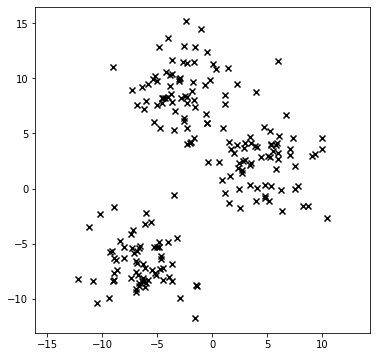

In [2]:
from sklearn.datasets import make_blobs

# Note que estamos ignorando os labels y - este é um problema de clustering, não de classificação.
X, _ = make_blobs(n_samples=200, centers=3, n_features=2, cluster_std=2.5, random_state=RANDOM_SEED)

plt.figure(figsize=(6, 6))
plt.scatter(X[:,0], X[:,1], c='black', marker='x')
plt.axis('equal')
plt.show()

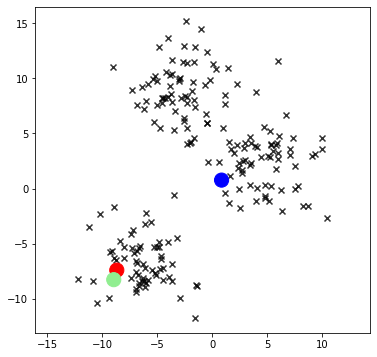

In [3]:
k = 3
colors = ['red', 'lightgreen', 'blue']

# Seleciona os centroides iniciais. 
np.random.seed(RANDOM_SEED)
idx = np.random.choice(X.shape[0], size=(k,), replace=False)
C = X[idx, :]

plt.figure(figsize=(6, 6))
plt.scatter(X[:,0], X[:,1], c='black', marker='x', alpha=0.8)
plt.scatter(C[:,0], C[:,1], c=colors, s=200)
plt.axis('equal')
plt.show()

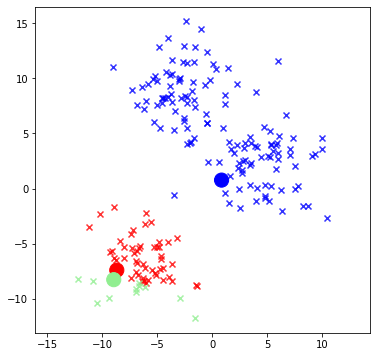

In [4]:
# Agora associa cada ponto ao seu centroide mais proximo.
def distancia(a, b):
    return np.sqrt(np.sum((a - b)**2))

def acha_mais_proximo(x, C):
    mais_proximo = 0
    dist_mais_proximo = distancia(x, C[0,:])
    for j in range(1, C.shape[0]):
        dist = distancia(x, C[j,:])
        if dist < dist_mais_proximo:
            dist_mais_proximo = dist
            mais_proximo = j
    return mais_proximo

def atualiza_cluster(X, C):
    cluster = np.zeros(X.shape[0], dtype=np.int)
    for i in range(X.shape[0]):
        cluster[i] = acha_mais_proximo(X[i,:], C)
    return cluster

cluster = atualiza_cluster(X, C)

plt.figure(figsize=(6, 6))
for i in range(k):
    idx = cluster == i
    plt.scatter(X[idx,0], X[idx,1], c=colors[i], marker='x', alpha = 0.8)
plt.scatter(C[:,0], C[:,1], c=colors, s=200)
plt.axis('equal')
plt.show()

Antigo é bolinha, novo é diamante.


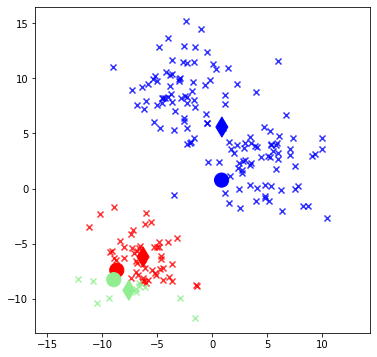

In [5]:
# Recalcula os centroides.
def recalcula_centroides(X, cluster):
    C = np.zeros((k, X.shape[1]))
    for i in range(k):
        idx = cluster == i
        C[i,:] = X[idx,:].mean(axis=0)
    return C

C_novo = recalcula_centroides(X, cluster)

print('Antigo é bolinha, novo é diamante.')
plt.figure(figsize=(6, 6))
for i in range(k):
    idx = cluster == i
    plt.scatter(X[idx,0], X[idx,1], c=colors[i], marker='x', alpha = 0.8)
plt.scatter(C[:,0], C[:,1], c=colors, s=200)
plt.scatter(C_novo[:,0], C_novo[:,1], c=colors, s=200, marker='d')
plt.axis('equal')
plt.show()

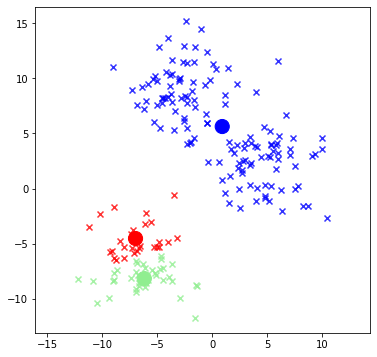

In [6]:
# Por fim, o algoritmo k-means repete o processo várias vezes.
def max_dist_pontos(C, C_novo):
    max_dist = 0.0
    for i in range(C.shape[0]):
        dist = distancia(C[i,:], C_novo[i,:])
        if dist > max_dist:
            max_dist = dist
    return max_dist
        
def k_means(X, k, C_init=None, max_iter=10, eps = 1e-3):
    if C_init is None:
        # Seleciona os centroides iniciais. 
        idx = np.random.choice(X.shape[0], size=(k,), replace=False)
        C = X[idx, :]
    else:
        C = C_init

    for i in range(max_iter):
        cluster = atualiza_cluster(X, C)
        C_novo = recalcula_centroides(X, cluster)
        max_dist = max_dist_pontos(C, C_novo)
        C = C_novo
        if max_dist < eps:
            break
    return C

np.random.seed(RANDOM_SEED)
C = k_means(X, k)

cluster = atualiza_cluster(X, C)

plt.figure(figsize=(6, 6))
for i in range(k):
    idx = cluster == i
    plt.scatter(X[idx,0], X[idx,1], c=colors[i], marker='x', alpha = 0.8)
plt.scatter(C[:,0], C[:,1], c=colors, s=200)
plt.axis('equal')
plt.show()

Observe que o k-means convergiu, mas não para a clusterização esperada! Vamos repetir o processo com pontos iniciais mais razoáveis:

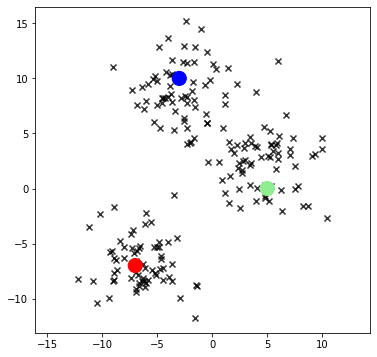

In [7]:
C = np.array([[-7, -7], [5, 0], [-3, 10]])

plt.figure(figsize=(6, 6))
plt.scatter(X[:,0], X[:,1], c='black', marker='x', alpha=0.8)
plt.scatter(C[:,0], C[:,1], c=colors, s=200)
plt.axis('equal')
plt.show()

Agora vamos ver se o algoritmo converge para algo mais razoavel:

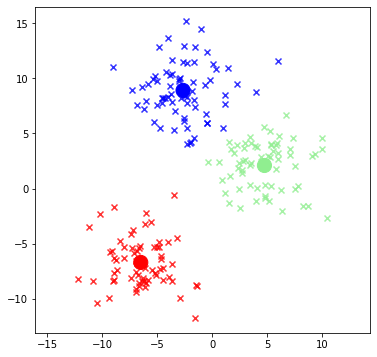

In [8]:
np.random.seed(RANDOM_SEED)
C = k_means(X, k, C_init=C)

cluster = atualiza_cluster(X, C)

plt.figure(figsize=(6, 6))
for i in range(k):
    idx = cluster == i
    plt.scatter(X[idx,0], X[idx,1], c=colors[i], marker='x', alpha = 0.8)
plt.scatter(C[:,0], C[:,1], c=colors, s=200)
plt.axis('equal')
plt.show()

Ok, parece que agora funcionou...

**Atividade:**

Considere a situação abaixo:

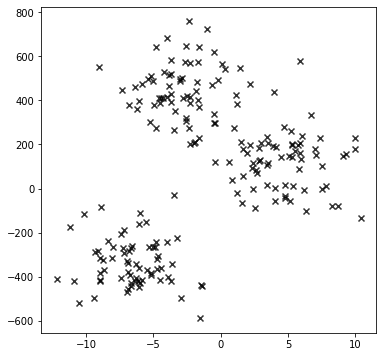

In [9]:
Xs = X.copy()
Xs[:,1] *= 50

plt.figure(figsize=(6, 6))
plt.scatter(Xs[:,0], Xs[:,1], c='black', marker='x', alpha=0.8)
# plt.axis('equal')
plt.show()

- Aplique o algoritmo k-means para clusterizar este dataset, e mostre o resultado final.

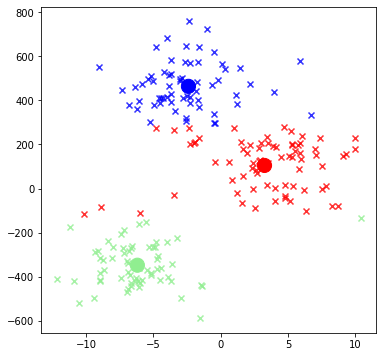

In [10]:
np.random.seed(RANDOM_SEED)
C_ = k_means(Xs, k)

cluster_ = atualiza_cluster(Xs, C_)

plt.figure(figsize=(6, 6))
for i in range(k):
    idx = cluster_ == i
    plt.scatter(Xs[idx,0], Xs[idx,1], c=colors[i], marker='x', alpha = 0.8)
plt.scatter(C_[:,0], C_[:,1], c=colors, s=200)
# plt.axis('equal')
plt.show()

- Este clustering ficou bom? Explique o que aconteceu.

**R:** Não ficou bom. Como os eixos estão em unidades diferentes, a distância média entre os centros não fica adequado, dividindo os dados da forma vista acima: parecem, nesse caso, faixas do eixo $y$, menores que $-200$, entre $-200$ e $300$ e maiores que $300$

- Qual a complexidade de cada passo do algoritmo k-means?

**R:** 

Para cada iteração (seja i o número de iterações), temos:

- varrer os $m$ pontos;
- comparar cada ponto com uma âncora ($k$ pontos);
- cada comparação envolve $n$ subtrações, $n$ multiplicações, logo $n-1$ somas e uma raiz quadrada;

$O(kmni)$

**Atividade:**

Implemente o clustering do dataset original usando o scikit-learn.

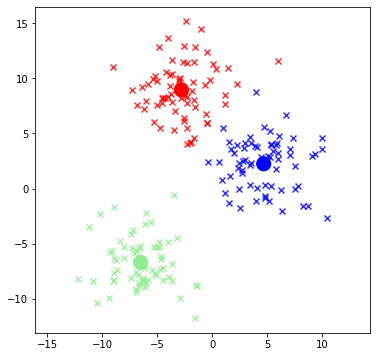

In [11]:
from sklearn.cluster import KMeans
# k=5
# colors = ['red', 'lightgreen', 'blue', 'yellow', 'orange']
kmeans = KMeans(n_clusters=k, random_state=RANDOM_SEED).fit(X)
pred = kmeans.predict(X)

C = kmeans.cluster_centers_

plt.figure(figsize=(6, 6))
for i in range(k):
    idx = pred == i
    plt.scatter(X[idx,0], X[idx,1], c=colors[i], marker='x', alpha = 0.8)
plt.scatter(C[:,0], C[:,1], c=colors, s=200)
plt.axis('equal')
plt.show()


# Mean shift clustering

Observamos que geralmente os clusters tem uma densidade de pontos maior em seu centro do que na periferia. Agora imagine um ponto qualquer do conjunto de dados: como a vizinhança deste ponto se parece? Pela propriedade anterior, podemos imaginar que existe uma densidade maior de pontos na vizinhança de um ponto dado na direção do centro do cluster. Se calcularmos o ponto médio dos pontos desta vizinhança, nos aproximamos do centro do cluster.

Essa é a idéia básica do algoritmo "mean shift clustering". Vamos explorar este conceito. Primeiramente vamos sortear pontos ao acaso do dataset.

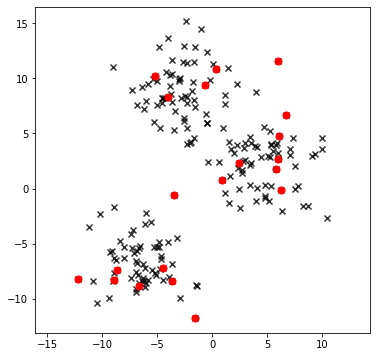

In [12]:
num_pts = 20

# Seleciona os pontos iniciais. 
np.random.seed(RANDOM_SEED)
idx = np.random.choice(X.shape[0], size=(num_pts,), replace=False)
C = X[idx, :]

plt.figure(figsize=(6, 6))
plt.scatter(X[:,0], X[:,1], c='black', marker='x', alpha=0.8)
plt.scatter(C[:,0], C[:,1], c='red', s=50)
plt.axis('equal')
plt.show()

Agora procedemos da seguinte forma: para cada ponto de referência em C, vamos determinar a posição média de seus vizinhos (dentro de um raio dado).

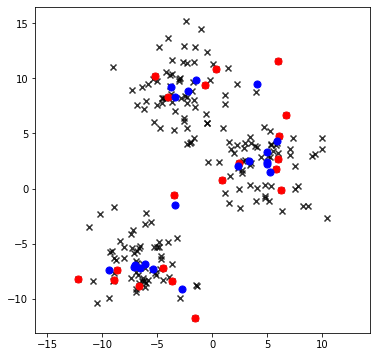

In [13]:
R = 5

def atualiza_pontos(X, C, R):
    C_novo = np.zeros(C.shape)
    n_novo = np.zeros(C.shape[0])

    for i in range(C.shape[0]):
        for j in range(X.shape[0]):
            if distancia(X[j,:], C[i,:]) < R:
                C_novo[i,:] += X[j,:]
                n_novo[i] += 1.0
        C_novo[i,:] /= n_novo[i]
    return C_novo

C_novo = atualiza_pontos(X, C, R)

plt.figure(figsize=(6, 6))
plt.scatter(X[:,0], X[:,1], c='black', marker='x', alpha=0.8)
plt.scatter(C[:,0], C[:,1], c='red', s=50)
plt.scatter(C_novo[:,0], C_novo[:,1], c='blue', s=50)
plt.axis('equal')
plt.show()


Observe que os pontos atualizados migraram para o centro dos clusters! Vamos agora agrupar pontos que estão muito próximos entre si, pois não faz sentido manter dois pontos idênticos neste conjunto.

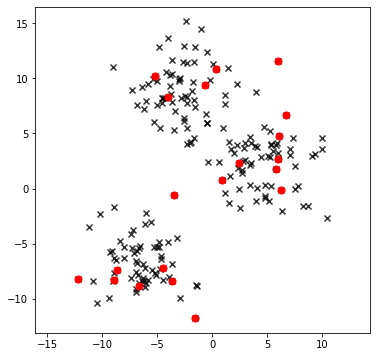

In [14]:
def elimina_similares(C, eps=1e-3):
    C_novo = C.copy()
    i = 0
    while i < C_novo.shape[0]:
        j = i + 1
        while j < C_novo.shape[0]:
            if distancia(C_novo[i,:], C_novo[j,:]) < eps:
                C_novo = np.delete(C_novo, (j), axis=0)
            else:
                j += 1
        i += 1
    return C_novo
        
C = elimina_similares(C)

plt.figure(figsize=(6, 6))
plt.scatter(X[:,0], X[:,1], c='black', marker='x', alpha=0.8)
plt.scatter(C[:,0], C[:,1], c='red', s=50)
plt.axis('equal')
plt.show()

Vamos continuar este processo até que o algoritmo convirja:

[[-2.94933702  8.60851951]
 [-6.4569137  -6.79066111]
 [ 4.15177938  2.19477722]]


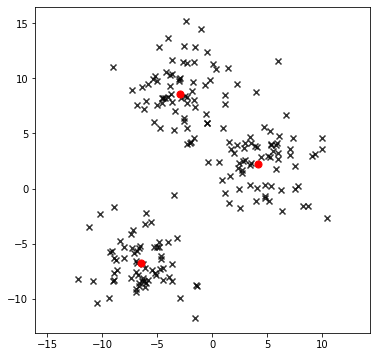

In [15]:
def mean_shift(X, C_init=None, k=10, max_iter=30, eps_elimina=1e-9, eps_para = 1e-9):
    if C_init is None:
        # Seleciona os centroides iniciais. 
        idx = np.random.choice(X.shape[0], size=(k,), replace=False)
        C = X[idx, :]
    else:
        C = C_init

    for i in range(max_iter):
        C_novo = atualiza_pontos(X, C, R)    
        max_dist = max_dist_pontos(C, C_novo)
        C = C_novo
        if max_dist < eps_para:
            break
        C = elimina_similares(C, eps=eps_elimina)
        
    return C

C_mf = mean_shift(X, k=20, eps_elimina=0.5, eps_para=1e-6)
print(C_mf)

plt.figure(figsize=(6, 6))
plt.scatter(X[:,0], X[:,1], c='black', marker='x', alpha=0.8)
plt.scatter(C_mf[:,0], C_mf[:,1], c='red', s=50)
plt.axis('equal')
plt.show()

Finalmente podemos associar cada amostra ao seu ponto representativo mais próximo, como no caso do k-means:

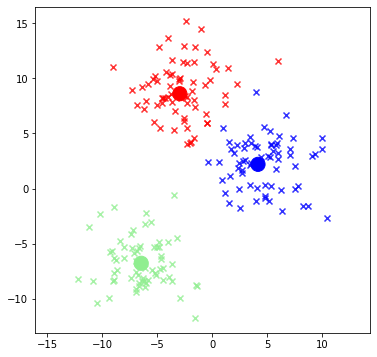

In [16]:
cluster = atualiza_cluster(X, C_mf)

plt.figure(figsize=(6, 6))
for i in range(C_mf.shape[0]):
    idx = cluster == i
    plt.scatter(X[idx,0], X[idx,1], c=colors[i], marker='x', alpha = 0.8)
plt.scatter(C_mf[:,0], C_mf[:,1], c=colors, s=200)
plt.axis('equal')
plt.show()

**Atividade:**

Implemente o clustering do dataset original usando scikit-learn

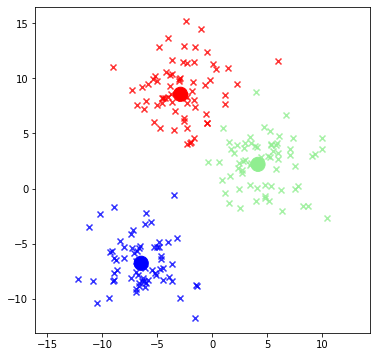

In [17]:
from sklearn.cluster import MeanShift

meanShift = MeanShift(bandwidth=5).fit(X)

meanShiftPred = meanShift.predict(X)

C_ = meanShift.cluster_centers_

plt.figure(figsize=(6, 6))
for i in range(C_.shape[0]):
    idx = meanShiftPred == i
    plt.scatter(X[idx,0], X[idx,1], c=colors[i], marker='x', alpha = 0.8)
plt.scatter(C_[:,0], C_[:,1], c=colors, s=200)
plt.axis('equal')
plt.show()

# Outros métodos

Existem vários outros métodos de clustering, como DBSCAN, clustering hierárquico aglomerativo e modelos de mistura de Gaussianas, que valem a pena conhecer. Mas para uma aula introdutória de clustering, está bom.

**Atividades:**

- Explique o funcionamento do DBSCAN
- Explique o funcionamento do clustering hierárquico. Compare com árvores de decisão.

**R:**

- DBSCAN:
    1. Escolher valor para "raio de influência" R;
    2. Escolha $1$ ponto e inicie um processo de "infecção":
        - infecte os vizinhos num raio R;
        - os vizinhos infectados infecam seus vizinhos, e assim em diante, até esgotar.

    3. Escolher outro ponto e repitir o passo 2, até não existirem mais pontos. 
    
- clustering hierárquico: 
    1. cada ponto trata de um único cluster;
    2. identifica dois clusters próximos e os combina em um cluster maior.
    3. Repete 2 até todos os clusters estarem agrupados.

    Cada 'merge' entre cluster vai crescendo, como se fosse os galhos de uma árvore. Parece uma árvore de decisão invertida, onde começamos com cada ponto bem definido e individualizado.

```
   ______
__|__    |
|   _|_  |
|  |  |  |
A  B  C  D
```

# Apendice: clustering de palavras usando word2vec

In [18]:
import string

from gensim.models import Word2Vec
from sklearn.datasets import fetch_20newsgroups

def process_doc(doc):
    def normalize_string(s):
        table_punct = str.maketrans({key: None for key in string.punctuation})
        return s.strip().lower().translate(table_punct)
    return ' '.join([normalize_string(line) for line in doc.split('\n')])

data = fetch_20newsgroups(subset='train', shuffle=True)

sentences = np.array([process_doc(doc).split() for doc in data.data], dtype=np.object)
print(sentences.shape)

(11314,)


In [19]:
# train model
model = Word2Vec(sentences, size=300, min_count=50)
words = np.array(list(model.wv.vocab), dtype=np.object)
X_words = model.wv[words]

In [20]:
model.wv.most_similar('small')

[('large', 0.7663905620574951),
 ('huge', 0.6415234804153442),
 ('heavy', 0.6343768835067749),
 ('metal', 0.6300150752067566),
 ('wide', 0.607309103012085),
 ('low', 0.5971347689628601),
 ('minimum', 0.5927871465682983),
 ('rare', 0.5893547534942627),
 ('plastic', 0.5886893272399902),
 ('deep', 0.5884072780609131)]

In [21]:
print(X_words.shape)

(5332, 300)


In [22]:
from sklearn.cluster import KMeans
n_clusters = 20
kmeans = KMeans(n_clusters=n_clusters, random_state=RANDOM_SEED, n_jobs=-1)
result = kmeans.fit_predict(X_words)

c:\users\mathe\appdata\local\programs\python\python38\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


In [23]:
def cosine(a,b):
    return a.dot(b)/np.sqrt(a.dot(a) * b.dot(b))

words_per_cluster = [[] for _ in range(n_clusters)]

for w, x, k in zip(words, X_words, result):
    dist = 1 - cosine(x, kmeans.cluster_centers_[k])
    words_per_cluster[k].append((dist, w))

In [24]:
import heapq
from pprint import pprint

n_words = 20

for i in range(n_clusters):
    print("Cluster {}".format(i))
    print("-----")
    pprint([res[1] for res in heapq.nsmallest(n_words, words_per_cluster[i])])
    print()

Cluster 0
-----
['52',
 '83',
 '62',
 '66',
 '58',
 '76',
 '79',
 '77',
 '87',
 '78',
 '68',
 '63',
 '81',
 '112',
 '82',
 '67',
 'har',
 '69',
 '74',
 '65']

Cluster 1
-----
['belief',
 'nature',
 'existence',
 'religion',
 'interpretation',
 'scripture',
 'fallacy',
 'truth',
 'argument',
 'proof',
 'conclusion',
 'faith',
 'concept',
 'behavior',
 'definition',
 'assumption',
 'statement',
 'moral',
 'reasoning',
 'atheism']

Cluster 2
-----
['started',
 'decided',
 'said',
 'saw',
 'father',
 'claimed',
 'learned',
 'wife',
 'her',
 'mother',
 'felt',
 'met',
 'yesterday',
 'pain',
 'lived',
 'went',
 'told',
 'got',
 'brought',
 'finally']

Cluster 3
-----
['isnt',
 'is',
 'wasnt',
 'thats',
 'youre',
 'makes',
 'theyre',
 'happens',
 'theres',
 'goes',
 'gets',
 'hes',
 'was',
 'works',
 'im',
 'comes',
 'seems',
 'sounds',
 'looks',
 'gives']

Cluster 4
-----
['motherboard',
 'ethernet',
 'vga',
 'video',
 'printer',
 'adapter',
 'io',
 'vesa',
 'builtin',
 'port',
 '486',
 'cdr